In [192]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [193]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  

In [194]:
# Reading CSV file
raw_data = pd.read_csv("Consumer_Complaints.csv")

In [195]:
# Displaying top 5 records
raw_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [196]:
# Listing all the columns 
raw_data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

In [197]:
raw_data.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
1025005,04-10-2017,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company has responded to the consumer and the ...,PENTAGON FEDERAL CREDIT UNION,TX,77802,NaN,NaN,Referral,04-11-2017,Closed with explanation,Yes,No,2428130,NaN
1025006,02-07-2017,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I had an account with XXXX in XX/XX/XXXX this ...,Company believes it acted appropriately as aut...,ERC,NY,115XX,Servicemember,Consent provided,Web,02-07-2017,Closed,Yes,No,2331270,NaN
1025007,01-04-2017,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,I was contacted on XX/XX/XXXX email by XXXX fr...,NaN,"Caliber Home Loans, Inc.",FL,336XX,NaN,Consent provided,Web,01-04-2017,Closed with explanation,Yes,No,2274241,NaN
1025008,09/28/2015,Debt collection,Non-federal student loan,Disclosure verification of debt,Not given enough info to verify debt,NaN,Company chooses not to provide a public response,"Progressive Financial Services, Inc.",OH,44017,NaN,NaN,Postal mail,09/30/2015,Closed with explanation,Yes,No,1582525,NaN
1025009,08/19/2016,Debt collection,Payday loan,Cont'd attempts collect debt not owed,Debt is not mine,I had a debit that was included in my chapter ...,Company believes it acted appropriately as aut...,Midwest Recovery Systems,FL,336XX,NaN,Consent provided,Web,08/19/2016,Closed with explanation,Yes,Yes,2073214,NaN


In [198]:
data = pd.DataFrame(raw_data['Consumer Complaint'].to_list(),columns=['Text'])
data.count()

Text    277814
dtype: int64

In [199]:
data = data.dropna()

In [200]:
data.count()

Text    277814
dtype: int64

In [201]:
data['Length'] = data.apply(lambda row: len(row['Text']),axis=1)
data.head()

,Text,Length
1,I have outdated information on my credit repor...,200
2,I purchased a new car on XXXX XXXX. The car de...,2042
7,An account on my credit report has a mistaken ...,1165
12,This company refuses to provide me verificatio...,136
16,This complaint is in regards to Square Two Fin...,1796


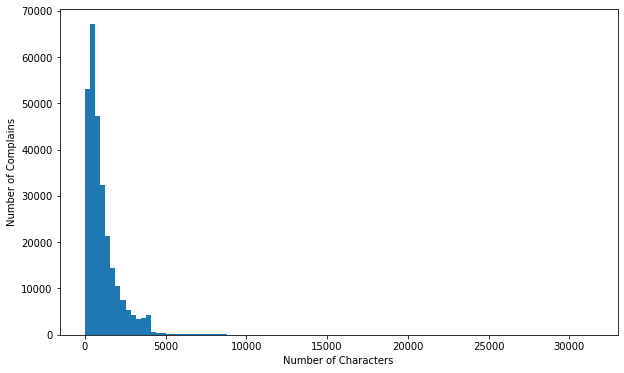

In [202]:
# Plotting length of orginal text
plt.figure(figsize=(10,6))
plt.hist(data['Length'],bins=100)
plt.xlabel("Number of Characters")
plt.ylabel("Number of Complains")
plt.show()

In [203]:
product_count = raw_data.groupby("Product").Product.count()

<BarContainer object of 18 artists>

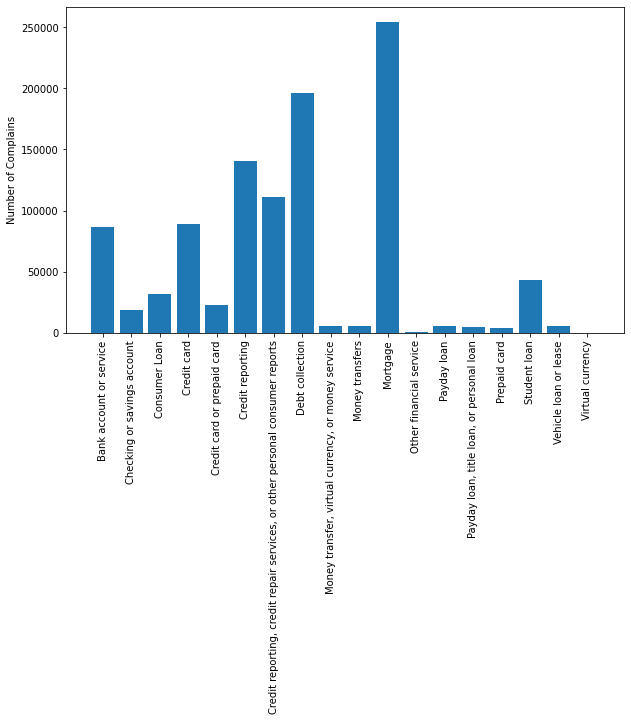

In [204]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.ylabel("Number of Complains")
plt.bar(product_count.index,product_count.values,)

In [205]:
stopwords = stopwords.words("english")

In [206]:
# Applying Text Preprocessing Techniques
def clean_text(text,lemmatizer):
    text = text.lower()
    text = re.sub("[\n\t]"," ",text)
    text = re.sub(r"(.)\1{1,}","",text)
    text = re.sub("[%s]"%re.escape(string.punctuation)," ",text)
    text = re.sub("[0-9]*","",text)
    text = text.split()
    tokenized = [t.strip() for t in text]
    noStop = set([lemmatizer.lemmatize(word) for word in tokenized if word not in stopwords])
    cleanText = " ".join(noStop)
    return cleanText

In [207]:
lemmatizer = WordNetLemmatizer()
data['Text'] = data.apply(lambda row:clean_text(row['Text'],lemmatizer) ,axis=1)

In [208]:
data['Text'].head()

1     removed mt disputed requirement previously sev...
2     amount checking tk sometimes deliberately date...
7     worded mail answer lawful explanation handled ...
12    believe per verification provide company refus...
16    include document title copied via also informa...
Name: Text, dtype: object

In [209]:
tfidf = TfidfVectorizer(stop_words="english",ngram_range=(1,3),use_idf=True,max_features=1000)

In [210]:
tfidf_features = tfidf.fit_transform(data['Text'])

In [211]:
tfidf_features.shape

(277814, 1000)

In [212]:
pca = PCA(n_components=2,copy=False)
pcaOut = pca.fit_transform(tfidf_features.toarray())

In [213]:
pcaOut.shape

(277814, 2)

In [214]:
pca.explained_variance_ratio_.sum()

0.024385895855027928

In [215]:
kmeans = KMeans(n_clusters=5).fit(pcaOut)

In [216]:
kmeans.labels_.shape

(277814,)

In [220]:
pcaDF = pd.DataFrame(data=pca.components_,columns=tfidf.get_feature_names(),index=['PCA-1','PCA-2'])

In [221]:
pcaDF.head()

,aached,aarently,ability,able,absolutely,act,action,activity,actual,actuay,...,write,writing,wrong,wrote,year,year believe,year credit,year owe,yes,yesterday
PCA-1,0.024728,-0.011378,-0.000761,-0.04939,-0.008847,0.045166,-0.003852,0.005706,-0.003434,-0.019039,...,-0.009070,-0.000829,-0.011337,-0.001818,-0.052112,-0.012116,0.017170,-0.008780,-0.015284,-0.012070
PCA-2,-0.049781,-0.004790,-0.009103,-0.01580,-0.005367,-0.098792,-0.056645,-0.018767,-0.017624,-0.010553,...,-0.007053,-0.047219,0.002657,-0.015186,0.035567,-0.002879,0.026702,-0.002438,-0.005055,-0.003723


In [232]:
finalDF = pd.DataFrame(data=pcaOut,columns=['PC-1','PC-2'])

In [233]:
finalDF['Cluster_#'] = kmeans.labels_

In [234]:
finalDF.head()

,PC-1,PC-2,Cluster_#
0,0.276621,0.179134,3
1,-0.183872,-0.008042,4
2,0.035391,-0.110275,1
3,0.117717,-0.117420,1
4,0.072866,-0.131942,1


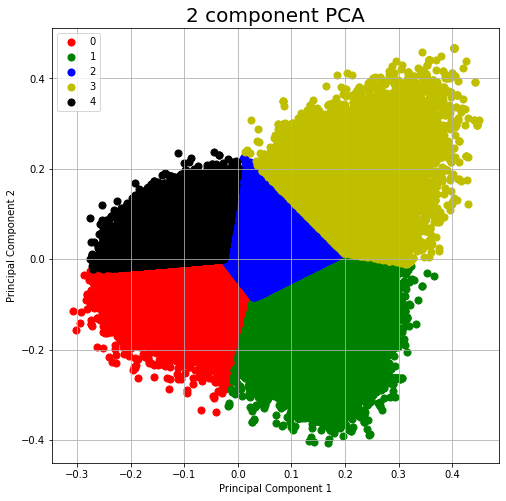

In [235]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4]
colors = ["r","g","b","y","k"]
for color,target in zip(colors,targets):
    indicesToKeep = finalDF['Cluster_#'] == target
    ax.scatter(finalDF.loc[indicesToKeep,'PC-1'],finalDF.loc[indicesToKeep,'PC-2'],s=50,c=color)
ax.legend(targets)
ax.grid()

In [128]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    print(k)
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(tfidf_features.toarray())
    kmeanModel.fit(tfidf_features.toarray())   
      
    distortions.append(sum(np.min(cdist(tfidf_features.toarray(), kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / tfidf_features.toarray().shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(tfidf_features.toarray(), kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / tfidf_features.toarray().shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1


KeyboardInterrupt: 

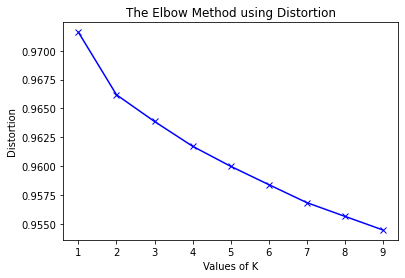

In [72]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()